## Generate handwritten digits with trained ResCVAE net

In [1]:
# Copyright (C) 2018 Zhixian MA <zx@mazhixian.me>

In [2]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [3]:
import tensorflow as tf

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
from rescvae.rescvae import rescvae
from rescvae.utils import utils

In [5]:
from rescvae.configs import config_mnist
from rescvae.configs import config_train

### Load mnist data

In [6]:
# Step1 load MNITST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=False, validation_size=5000)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
cf = config_mnist
tr_cf = config_train

### Build the net

In [8]:
net = rescvae(cf)
net.cvae_build()
net.net_print()

(?, 14, 14, 8)
(?, 7, 7, 16)
(?, 14, 14, 8)
(?, 28, 28, 1)
Layer ID    Layer type    Layer shape
0 Input layer [None, 28, 28, 11]
1 Block_en_0 [None, 28, 28, 11]
2 Block_en_1 [None, 14, 14, 8]
3 En_flatten [None, 784]
4 En_mu [None, 128]
5 En_sigma [None, 128]
6 z [None, 128]
7 De_flatten [None, 784]
8 De_flatten_to_conv [None, 7, 7, 16]
9 Block_de_0 [None, 14, 14, 8]
10 Block_de_1 [None, 28, 28, 1]
11 Output layer [None, 28, 28, 1]
12 Flatten [None, 28, 28, 1]


### Restore the net

In [9]:
net.get_learning_rate()
net.get_loss()
net.get_opt()

# load the net
import os
foldname = "./rescvae_mnist"
name = 'rescvae.pkl'
net.sess, name = utils.load_net(os.path.join(foldname, name))

INFO:tensorflow:Restoring parameters from ./rescvae_mnist/model_rescvae.ckpt


### Generate new samples

/home/mzx/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


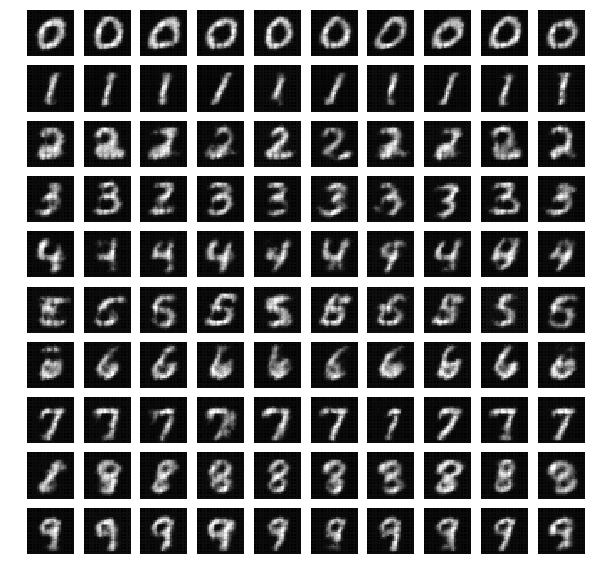

In [12]:
n_examples = 10

fig, axs = plt.subplots(cf.numclass, n_examples, figsize=(n_examples, cf.numclass))
for i in range(cf.numclass):
    z_gen = np.random.normal(0, 1, [n_examples, cf.z_length])
    # label
    labels = np.zeros([n_examples, cf.numclass])
    labels[:,i] = np.random.uniform(0.9,1.0)
    imgs = net.sess.run(
        net.output_flatten_de, 
        feed_dict = {net.z: z_gen, net.conditions: labels, 
                     net.is_training: False, 
                     net.keep_prob: 1.0})
    img_test = [np.reshape(imgs[i], [cf.rs, cf.rs]) for i in range(len(imgs))]
    for example_i in range(n_examples):
        # original
        axs[i][example_i].imshow(img_test[example_i], cmap='gray')
        axs[i][example_i].axis('off')

fig.show()
plt.draw()
plt.savefig("mnist_generated.png", bbox_inches='tight', dpi=200)